**PDSD KELOMPOK 1** <br>
Anggota  :
- Agung Rezalky (10123171)
- Aldo Revaldo      (10123163)
- Randi Adittiawan  (10123143)
- Elvin  Juniansha  (10123164)
- M.Zaidan Azhari   (10123136)

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import re #Regular Expression
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords') #Stopword
nltk.download('punkt') #Tokenisasi
nltk.download('wordnet') #Lemitisasi
nltk.download('punkt_tab') #

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.preprocessing.text import Tokenizer #Merubah kata jadi Angka ( ASCII)
from tensorflow.keras.preprocessing.sequence import pad_sequences #menyeragamkan Panjang Kata

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path lengkap ke file CSV
file_path = '/content/drive/MyDrive/H/SPAM text message 20170820 - Data.csv'
# Membaca file CSV
df = pd.read_csv(file_path)

In [ ]:
def preprocess_text(text):
    text = text.lower() #untuk merubah huruf kecil
    text = re.sub(r'[^a-z\s]', '', text) #menghapus karakter yang diinginkan
    word = word_tokenize(text) #tokenisasi (merubah text menjadi kata kata)
    stop_words = set(stopwords.words('english')) #menghapus kata yang tidak penting
    word = [w for w in word if w not in stop_words]
    lemmatizer = WordNetLemmatizer() #mengubah kata menjadi kata dasar
    word = [lemmatizer.lemmatize(w) for w in word]
    return ' '.join(word)
# Menambahkan kategori baru untuk spam
def classify_spam(message):
    if any(keyword in message.lower() for keyword in ['win', 'free', 'offer', 'prize', 'credit', 'membership','congratulation']):
        return 'Spam Iklan'
    elif any(keyword in message.lower() for keyword in ['urgent', 'claim', 'risk', 'account', 'security']):
        return 'Spam Penipuan'
    else:
        return 'ham'

In [ ]:
df['Tokens'] = df['Message'].apply(preprocess_text)
df['New_Category'] = df.apply(
    lambda row: row['Category'] if row['Category'] == 'ham' else classify_spam(row['Message']), axis=1
)
df.head()

,Category,Message,Tokens,New_Category
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,ham
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,Spam Iklan
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,ham


In [ ]:
Kalimat = df['Tokens'].values
Category = pd.get_dummies(df['New_Category']).values  # Encode kategori
Kalimat_latih, Kalimat_validasi, Category_latih, Category_validasi = train_test_split(Kalimat, Category, test_size=0.2) # Membagi Dataset
# Validation set = 20% dan Train set = 80%

In [ ]:
Tokenizer = Tokenizer(num_words=5000, oov_token='x') #Membuat Kumpulan kata Maksimal 5000
Tokenizer.fit_on_texts(Kalimat_latih)
Tokenizer.fit_on_texts(Kalimat_validasi)

sekuens_latih = Tokenizer.texts_to_sequences(Kalimat_latih) #Merubah ke Angka
sekuens_validasi = Tokenizer.texts_to_sequences(Kalimat_validasi)

padded_latih = pad_sequences(sekuens_latih,maxlen=20) #menyeragamkan kosaka
padded_validasi = pad_sequences(sekuens_validasi,maxlen=20)

In [ ]:
print(padded_latih)

[[   0    0    0 ... 1587 1207  178]
 [   0    0    0 ... 2467   78  577]
 [   0    0    0 ... 1894 1895 2468]
 ...
 [1140  361  180 ...   34  230  158]
 [   0    0    0 ...   32  139  103]
 [   0    0    0 ...    0   10   31]]


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16, input_length=20),  # Embedding Layer
    tf.keras.layers.LSTM(64, return_sequences=False),  # Menambahkan LSTM
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # menambahkan Dropout
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer 3 classes and softmax
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Implementasi Callback (EarlyStopping dan Reduce Learning Rate)

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

# Reduce learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1
)

In [ ]:
Category_latih = np.array(Category_latih)
Category_validasi = np.array(Category_validasi)

padded_latih = np.array(padded_latih)
padded_validasi = np.array(padded_validasi)

history = model.fit(
    padded_latih,
    Category_latih,
    epochs=30,
    validation_data=(padded_validasi, Category_validasi),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9125 - loss: 0.4771 - val_accuracy: 0.9444 - val_loss: 0.1409 - learning_rate: 0.0010
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9642 - loss: 0.1027 - val_accuracy: 0.9704 - val_loss: 0.0943 - learning_rate: 0.0010
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9740 - val_loss: 0.0876 - learning_rate: 0.0010
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9875 - loss: 0.0276 - val_accuracy: 0.9704 - val_loss: 0.0974 - learning_rate: 0.0010
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9883 - loss: 0.0292 - val_accuracy: 0.9767 - val_loss: 0.0842 - learning_rate: 0.0010
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9914 - loss: 0.0168 - val_accuracy: 0.9758 - val_loss: 0.0840 - learning_rate: 0.0010
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9957 - loss: 0.0163 -

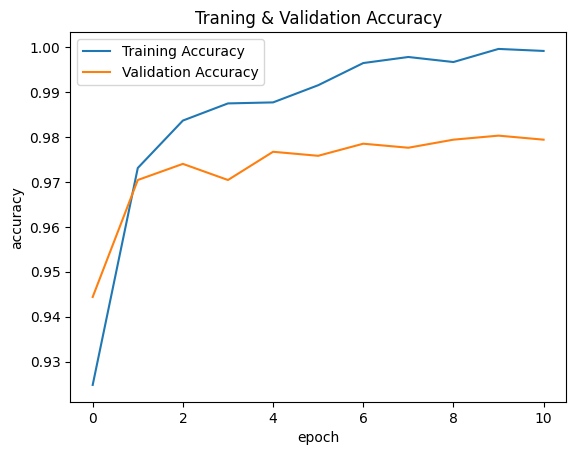

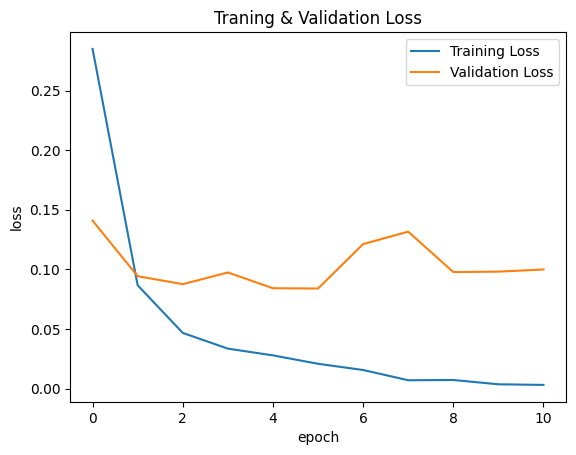

In [ ]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Traning & Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Traning & Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [ ]:
model.save('KlasifikasiTeks4Kelas.keras')

In [ ]:
model_prediksi = keras.models.load_model('KlasifikasiTeks4Kelas.keras')

In [ ]:
teks_baru = ['Congratulations! You’ve won a $1,000 gift card. Claim your prize now by providing your details: [Link]']

teks_prep = preprocess_text(teks_baru[0])

teks_seq = Tokenizer.texts_to_sequences([teks_prep])

teks_pad = pad_sequences(teks_seq, maxlen=20)

prediksi = model_prediksi.predict(teks_pad)
print(prediksi)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
[[9.9923527e-01 7.6475396e-04 2.3048198e-08]]


In [ ]:
prediksi = model.predict(teks_pad)
class_names = ['Spam Iklan', 'Spam Penipuan', 'ham']
predicted_class = class_names[np.argmax(prediksi[0])]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: Spam Iklan
